In [1]:
# X k-Means Clustering

# Ein anderer Typ von unsupervised Maschinenlernen Algorithmen (neben Dimensionsreduzierenden Verfahren) sind 
# Clusteralgorithmen, die versuchen eine optimale Unterteilung der Daten in diskrete Gruppen durchzuführen
# >> Diese sollten intern möglichst Homogen und extern möglichst herogen sein

# k-Means Clustering sucht dabei nach einer vorgegebenen Menge k von Clustern in einem multidimensionalen Datensatz
# ... Dabei folgt es einer Logik, die bestimmt, wie optimale Cluster aussehen sollten
# ... Das Cluster-Zentrum ist das arithmetische Mittel aus allen Punkten in dem Cluster und jeder Punkt ist näher an dem
#     eigenen Cluster-Zentrum als an anderen

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()


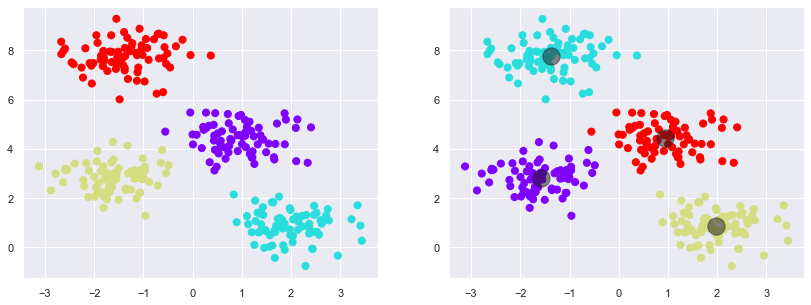

In [17]:
# Einfaches Beispiel für k-means
# Daten generieren
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], s=50, c=y_true, cmap="rainbow")

# Kmeans - Algorithmus testen
from sklearn.cluster import KMeans
# Modell erstellen
kmeans = KMeans(n_clusters=4)
# Fitten
kmeans.fit(X)
# Vorhersagen
y_pred = kmeans.predict(X)

# Ergebnisse plotten
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], s=50, c=y_pred, cmap="rainbow")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s=300, c="k", alpha=0.5)
# zeigt, dass der Algorithmus bei so einer einfachen Datenlage die Kluster sehr gut erlennt

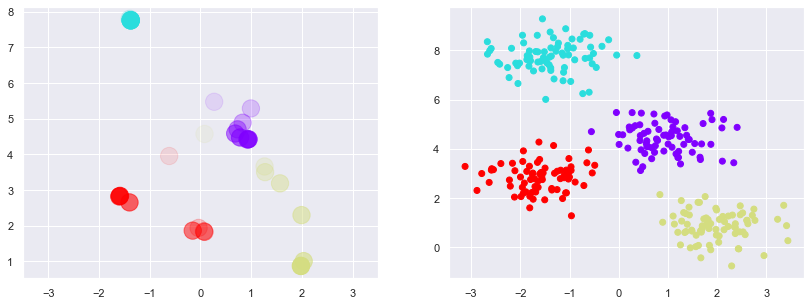

In [99]:
# X Expectation-Maximization
# Um die bestmöglichen Cluster schnell zu finden, folgt k-Means einem Algorithmus, der als Expectation-Maximization (E-M)
# bezeichnet wird. Der Ansatz ist wiefolgt:
# 1) Rate ein paar Cluster Zentren
# 2) Wiederhole bis sich die Zentren aus der nachfolgenden Wiederholung annähren
#    E-Step) Ordne alle Punkte dem nähsten Clusterzentrum zu (Expectation)
#    M-Step) Berechne ein neues Clusterzentrum aus den Mittelwerten der Cluster (Maximiert eine fitness function)
#    >> wiederhole E + M

# Jede Wiederholung des E- und M-Schrittes führt zu einer Verbesserung der Clustercharakteristiken

from sklearn.metrics import pairwise_distances_argmin

fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    # wählt n-Zufallswerte für den Index aus
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    tracker = 0
    while True:
        tracker += 0.1
        # print(centers), falls interessant
        
        # 2a Assign labels based on closest center (E)
        labels = pairwise_distances_argmin(X, centers)
        
        
        # Visualisierung der Zentren für mich
        plt.scatter(centers[:,0], centers[:,1], s=300, c=list(set(labels)), cmap="rainbow", alpha=tracker)
        plt.xlim(-3.5, 3.5)
        
        # 2b find centers from means of points (M)
        # .mean(0) = Spaltenmittelwert > Dadurch entsteht ein neuer Punkt als Zentrum
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c Kontrollieren ob sich alte und neue zentren übereinstimmen
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels
    
centers, labels = find_clusters(X, 4)

plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, cmap="rainbow")


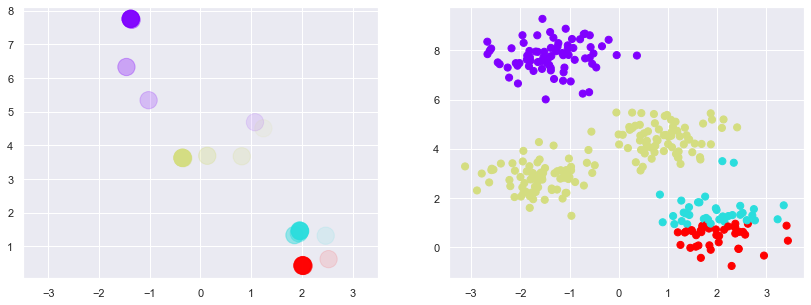

In [101]:
# Mit dem E-M Verfahren kann nicht gewährleistet werden, dass die beste Lösung gefunden wird
# e.g. ein anderer Random Seed findet nicht die beste Lösung
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)

# k-Means + Visualisierung der Centren
centers, labels = find_clusters(X, 4, rseed=0)

# Visualisierung der Lösung
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="rainbow")

C:\Users\Manue\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


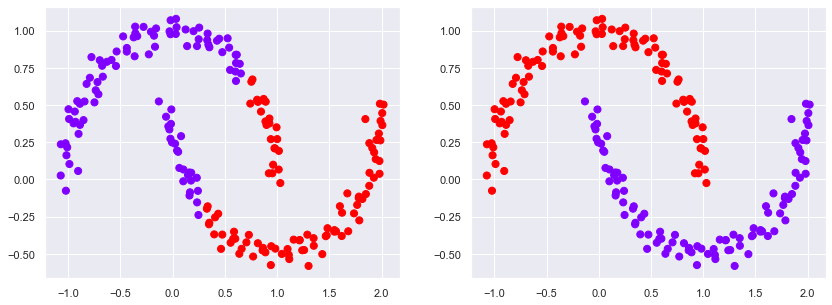

In [110]:
# Eine Herausforderung bei dem k-means-Clustering, ist dass die Anzahl an Cluster vorab festgelegt werden muss
# >> Dies kann nicht ohne Weiteres beurteilt werden

# Ein Ansatz dafür ist Silhouetten Analyse (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)
# >> ziemlich einfach erklärt (beruht auf dem Gedanken, dass die Cluster nicht zu nah und nicht zu weit voneinander entfernt sei sollten)


# K-Means geht von einem Linearen Zusammenhang aus
# Daher ist der Algorithmus oft schlechter geeignet für komplexere Zusammenhänge
from sklearn.datasets import make_moons

X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
fig = plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="rainbow")

# Um diesen Zusammenhang mit k-means untersuchbar zu machen, müssen die Daten in einen zweisimensionalen Raum projiziert
# werden
# Eine Kernel, die dies möglich macht ist SpectralClustering

from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels='kmeans')
labels = model.fit_predict(X)
plt.subplot(1, 2, 2)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="rainbow")

(1797, 64)
(10, 64)
0.7935447968836951


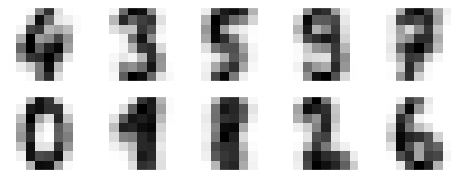

In [128]:
# Anwendungsbeispiel: k-Means und Zahlen
# Es wird versucht, ob k-Means Gemeinsamkeiten zwischen Zahlen erkennen kann ohne dabei vorher auf gelabelte Daten
# zurückzugreifen

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

# Clusteralgorithmus anwenden
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data) # vorhersage-Werte

print(kmeans.cluster_centers_.shape) # Zentren der jeweiligen Cluster
fig, ax = plt.subplots(2, 5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)
# k-Means findet CLuster, deren Zentren erkennbare Zahlen sind (evtl mit Ausnahme von 1 und 8)

from scipy.stats import mode

labels = np.zeros_like(clusters) #erzeugt eine leere Matrix, die den labeln entspricht
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # keine Ahnung, was das macht
    
from sklearn.metrics import accuracy_score
print(accuracy_score(digits.target, labels))

# Zeigt, dass mit einem einfachen k-Means CLustering eine Große Übereinstimmung erzeugt werden kann


Text(89.18, 0.5, 'Predicted')

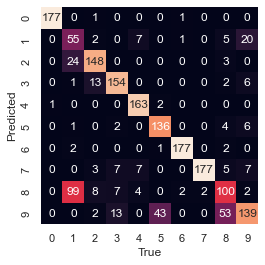

In [131]:
# Betrachten der Ergebnisse mit einer Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)

plt.xlabel('True')
plt.ylabel('Predicted')

# größere PRobleme beim unterscheiden von 8 und 1

In [134]:
# Es ist möglich den Algorithmus noch weiter zu verbessern, indem zunächst ein t-distributed stochastic neighbor embedding
# Algorithmus verwendet wird, um die Dimensionen zu reduzieren

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj=tsne.fit_transform(digits.data)

# Cluster berechnen
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the Labels
labels = np.zeros_like(clusters) #erzeugt eine leere Matrix, die den labeln entspricht
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0] # keine Ahnung, was das macht
    
# Cumpute Accuaray
print(accuracy_score(digits.target, labels))
# Accuracy sogar bei 94%


C:\Users\Manue\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Manue\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


0.9432387312186978


(427, 640, 3)


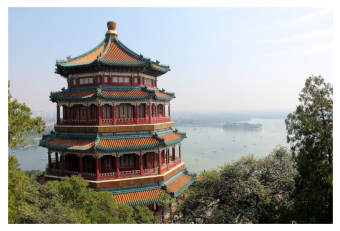

In [140]:
# Anwendungsbeispiel 2: k-Mens für Color-Compression
# Wenn ein Bild sher viele Farben haben, kann ein Teil der Farben im nahen Umfeld von Pixeln reduziert werden, um so Speicher
# zu sparen ohne die Qualität enorn zu reduzieren

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

print(china.shape)
# das Bild hat eine Höhe von 427, eine Breite von 640 und eine Information zu RGB (drei Zahlen von 0 bis 255)

(273280, 3)


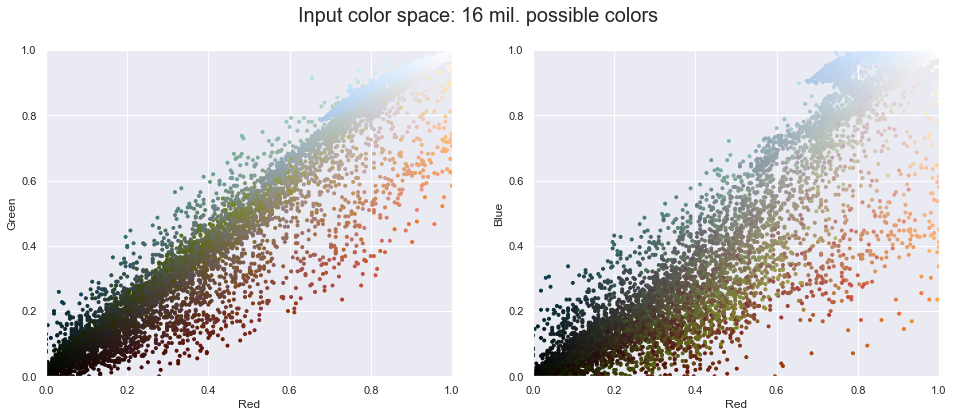

In [147]:

data = china/ 255
data=data.reshape(427*640, 3)
print(data.shape)


def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors=data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    
    fig.suptitle(title, size=20)
    
plot_pixels(data, title="Input color space: 16 mil. possible colors")

C:\Users\Manue\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


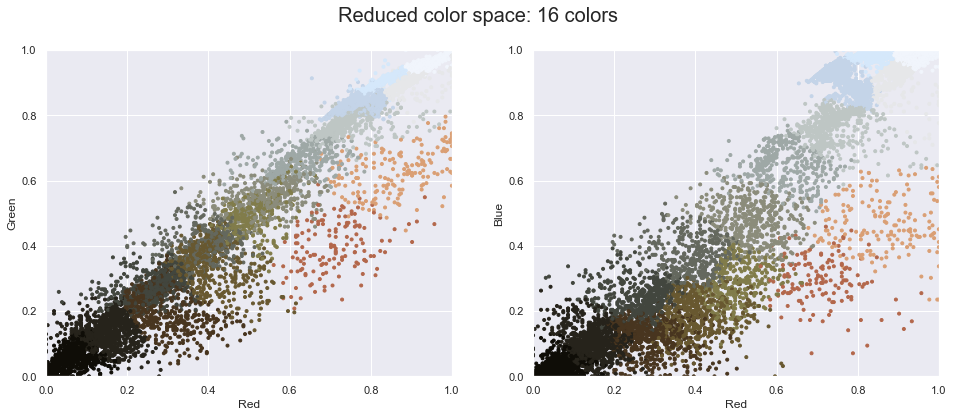

In [154]:
# Nun sollen 16 Mil Farben zu 16 reduziert werden
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, 
           title="Reduced color space: 16 colors")


Text(0.5, 1.0, '16-color Image')

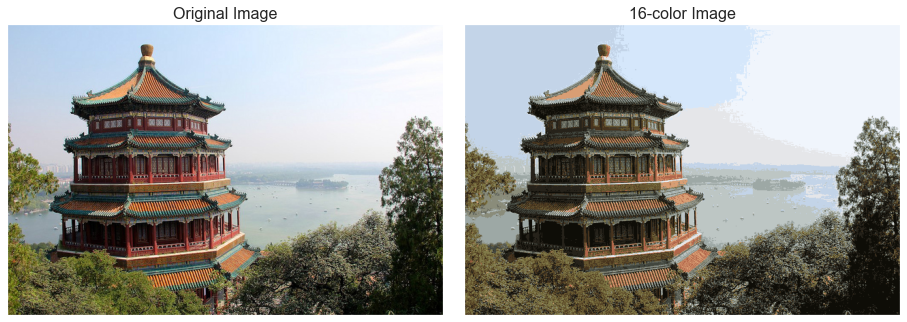

In [159]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image", size=16)

